In [1]:
import warnings
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from game import Game
from models import Player, Land, MockPlayer
from utils.fc import get_df_over_increase, create_mock_game, simulation, merge_dfs, get_diff, get_df_columns_mean, get_df_columns_sum
from utils.mpl import plot_scatter, plot_line_with_scatter

In [2]:
df = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,group=False)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='usual', group=False)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='unusual', group=False)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='rare', group=False)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='epic', group=False)
df = merge_dfs(dfs=[df, df1, df2, df3, df4], column='goldz', pk='day', limits=(20,30))


# COMPARING ATTACKS BETWEEN RARITYS

In [3]:
df

,day,no_hero,usual,unusual,rare,epic
20,11.0,4.70,5.10,5.88,6.34,6.72
21,11.0,5.10,5.38,5.64,6.06,6.78
22,12.0,4.70,5.32,5.54,6.60,6.92
23,12.0,4.88,5.04,5.70,6.36,6.80
24,13.0,4.98,5.34,5.80,6.18,6.82
25,13.0,4.74,4.94,5.78,6.54,6.74
26,14.0,4.84,5.18,6.04,6.40,6.80
27,14.0,5.02,5.48,6.00,6.52,6.64
28,15.0,4.68,5.08,5.64,6.20,6.82
29,15.0,4.74,5.12,6.10,6.00,6.94


# TOTAL GOLDZ AFTER 10 ATTACKS

In [4]:
df_sum = get_df_columns_sum(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_sum

,no_hero,usual,unusual,rare,epic
0,48.38,51.98,58.12,63.2,67.98


Text(0.5, 1.0, 'Total Goldz After 5 Days')

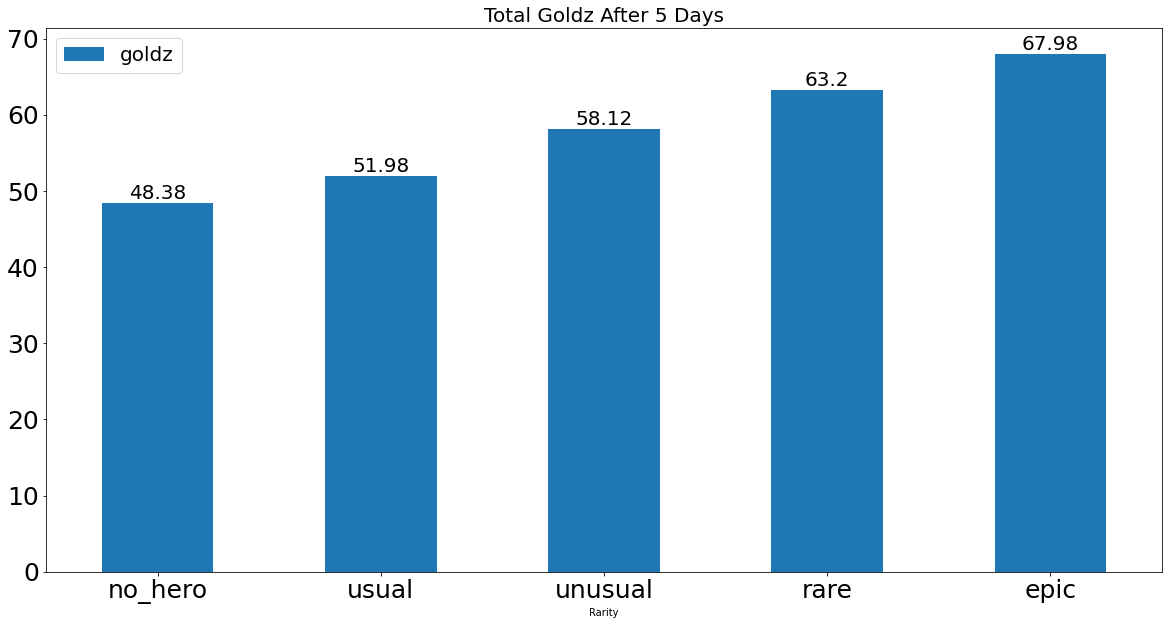

In [5]:
df_sum = pd.DataFrame({'heroes':df_sum.columns, 'goldz':df_sum.iloc[0].to_list()})

ax = df_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Total Goldz After 5 Days", fontsize=20)

# GOLDZ AVERAGE ON EACH ATTACK

In [6]:
df_mean = get_df_columns_mean(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_mean

,no_hero,usual,unusual,rare,epic
0,4.838,5.198,5.812,6.32,6.798


Text(0.5, 1.0, 'Goldz Average on Each attack')

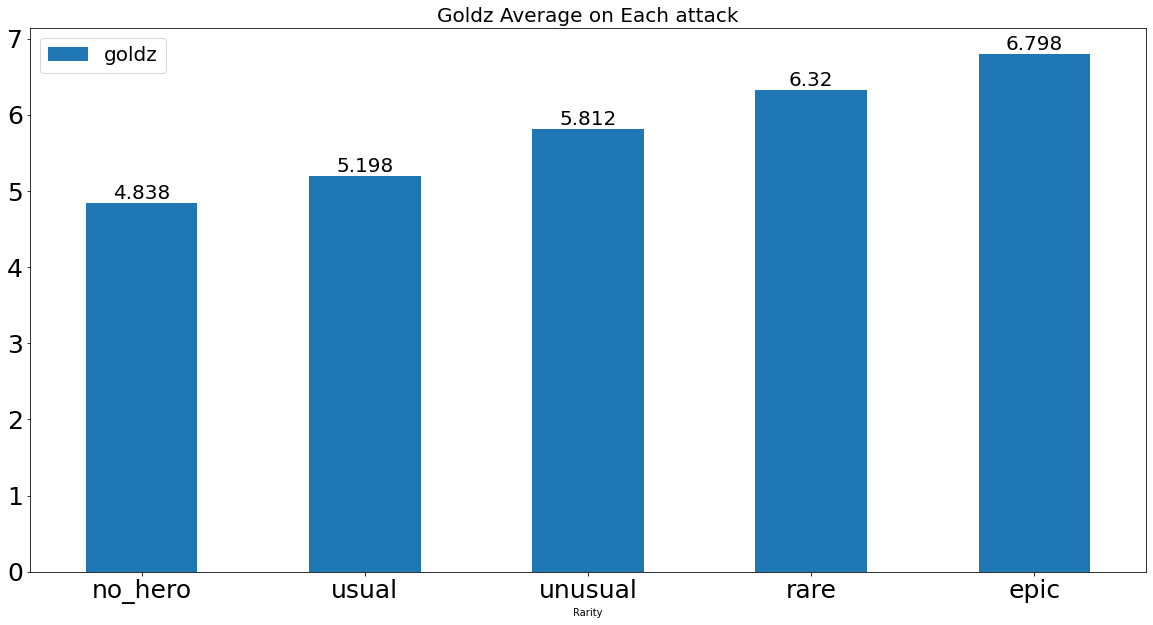

In [7]:

df_mean = pd.DataFrame({'heroes':df_mean.columns, 'goldz':df_mean.iloc[0].to_list()})

ax = df_mean.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Goldz Average on Each attack", fontsize=20)

# GOLDZ DIFFERENCE COMPARED TO NO HERO

In [8]:
df = get_diff(df=df)
df

,day,usual,unusual,rare,epic
20,11.0,0.40,1.18,1.64,2.02
21,11.0,0.28,0.54,0.96,1.68
22,12.0,0.62,0.84,1.90,2.22
23,12.0,0.16,0.82,1.48,1.92
24,13.0,0.36,0.82,1.20,1.84
25,13.0,0.20,1.04,1.80,2.00
26,14.0,0.34,1.20,1.56,1.96
27,14.0,0.46,0.98,1.50,1.62
28,15.0,0.40,0.96,1.52,2.14
29,15.0,0.38,1.36,1.26,2.20


# TOTAL GOLDZ EARNED COMPARED TO NO HERO

In [9]:
df_diff_sum = get_df_columns_sum(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_sum

,usual,unusual,rare,epic
0,3.6,9.74,14.82,19.6


Text(0.5, 1.0, 'Total Diff Goldz Compared to No Hero')

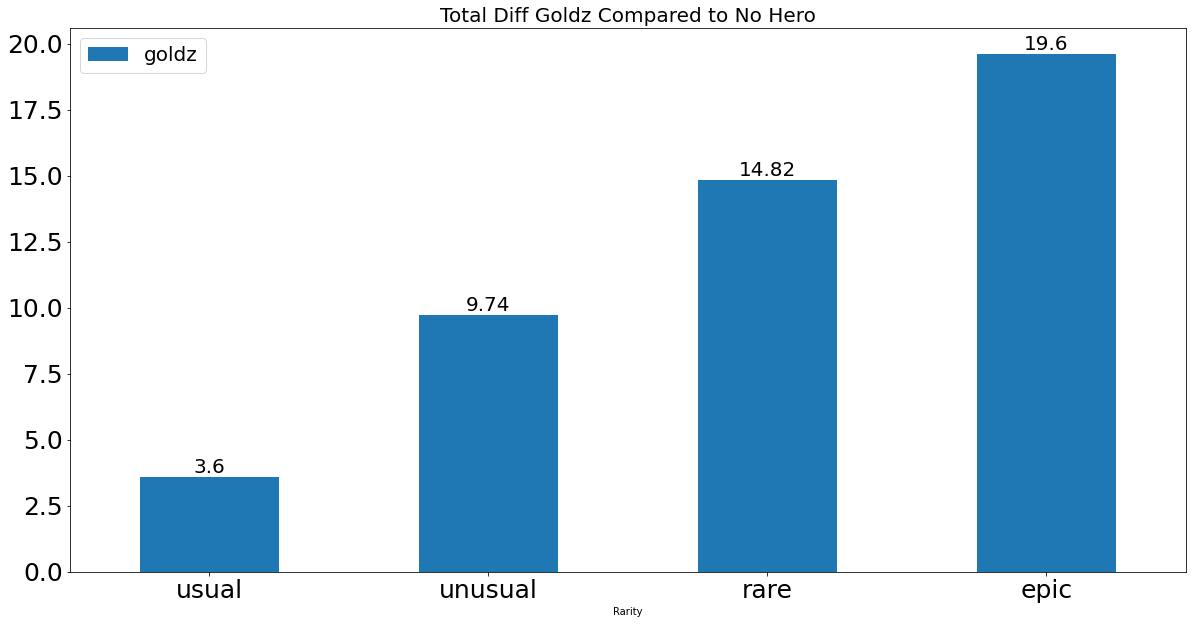

In [10]:
df_diff_sum = pd.DataFrame({'heroes':df_diff_sum.columns, 'goldz':df_diff_sum.iloc[0].to_list()})

ax = df_diff_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Total Diff Goldz Compared to No Hero", fontsize=20)

# GOLDZ DIFFERENCE EARNED PER ATTACK COMPARED TO NO HERO


In [11]:
df_diff_mean = get_df_columns_mean(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_mean

,usual,unusual,rare,epic
0,0.36,0.974,1.482,1.96


Text(0.5, 1.0, 'Diff Goldz Average per Attack')

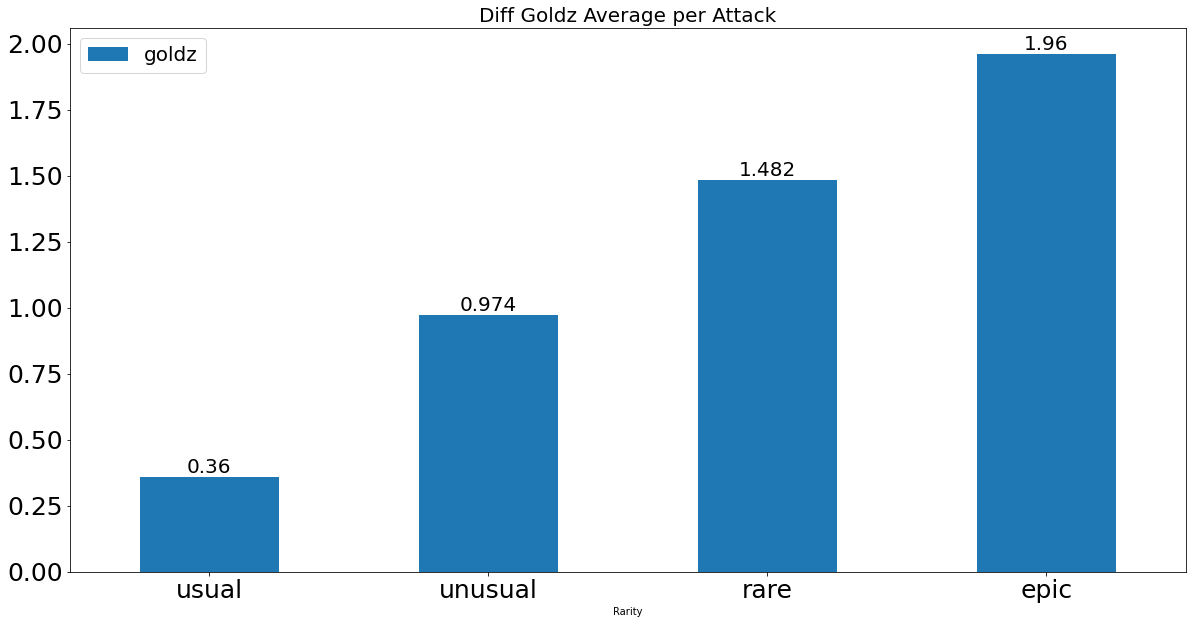

In [12]:
df_diff_mean = pd.DataFrame({'heroes':df_diff_mean.columns, 'goldz':df_diff_mean.iloc[0].to_list()})

ax = df_diff_mean.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Diff Goldz Average per Attack", fontsize=20)